<H1> Tone </H1> 
Test pyaudio ideas
<hr>
<H2>Modification history </H2><br> 
<table>
    <tr>
        <th> Modified </th>
        <th> By </th>
        <th> Reason </th>
    </tr>
    <tr> 
        <td> 22-Jun-25 </td>
        <td> CBL </td> 
        <td> Original </td>
    </tr>
</table>
<hr> 
<H2> References </H2> 
<a href="https://people.csail.mit.edu/hubert/pyaudio/docs/"> pyaudio docs </a> <br> 
<a href="https://stackoverflow.com/questions/40704026/voice-recording-using-pyaudio"> Example of voice recording</a> <br> 
<a href = "https://github.com/jleb/pyaudio/blob/master/test/record.py"> </a>

<H2> Notes </H2>

<br> 

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.constants as const
import scipy  as sp
import pyaudio
import wave

In [3]:
def ShowDevices():
    p = pyaudio.PyAudio()
    info = p.get_host_api_info_by_index(0)
    numdevices = info.get('deviceCount')

    for i in range(0, numdevices):
        if (p.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
            print("Input Device id ", i, " - ", p.get_device_info_by_host_api_device_index(0, i).get('name'))

In [4]:
class AudioTone():
    def __init__(self, FrameRate):
        """
        @param FrameRate - number of samples per second. (default)
        """
        self.SampleRate = FrameRate           # Samples/sec
        self.format     = pyaudio.paInt16


    def MakeSine(self, Freq, Amplitude=200, Seconds=1):
        """
        Make a sine wave with the:
        @param Freq - frequency in Hz
        @param Amplitude - somewhat aribitrary
        @param Seconds in seconds
        @return float64 of data in array. 
        """
        # Samples Per Cycle
        SamplesPerCycle = self.SampleRate/Freq #2 * Freq * Seconds #self.SampleRate           # number of total samples
        print('S/C: ', SamplesPerCycle)

        # create an array of time
        t = np.arange(0,self.SampleRate*Seconds)/self.SampleRate     # step time
        omega = 2.0*np.pi*Freq * 4
        Samples = Amplitude * np.sin(omega*t)

        return Samples
        
    def PlayData(self, DataIn):
        """
        ----------------------------------------------
        """
        p = pyaudio.PyAudio()
        stream = p.open(format= self.format,
                        channels=1,
                        rate=self.SampleRate,
                        output=True)
        # Play samples
        stream.write(DataIn)
        # Close stream (4)
        stream.close()
        # Release PortAudio system resources (5)
        p.terminate()

    def PlaySine(self, Freq, Duration=5):
        d = self.MakeSine(Freq, 32000, Duration)
        self.PlayData(d.astype(int))
        plt.plot(d[0:1000])
        plt.grid()
        plt.show()

    def PlayTone(self, Freq, rep=1):
        """
        ----------------------------------------------
        """
        dT = 4/Freq
        # Make some data. in this case 1 second worth. 
        d = self.MakeSine(Freq, 32000, dT)

        # open up pyaudio
        p = pyaudio.PyAudio()
        # start a stream of a single channel. 
        stream = p.open(format= self.format,
                        channels=1,
                        rate=self.SampleRate,
                        output=True)
        # Play samples
        N = int(rep/dT)
        for i in range(N):
            stream.write(d.astype(int))

        # Close stream (4)
        stream.close()
        # Release PortAudio system resources (5)
        p.terminate()
        plt.plot(d[1:1000])


S/C:  172.265625


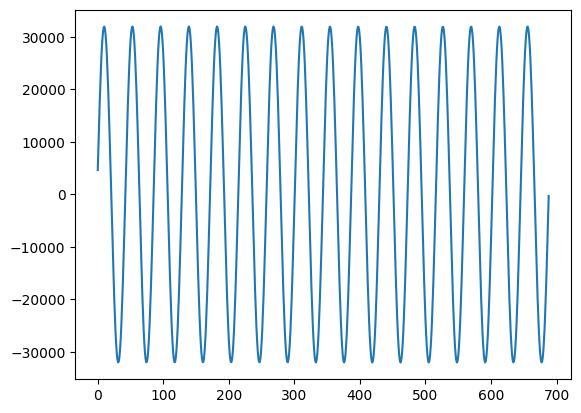

In [5]:
at = AudioTone(44100)
#at.PlaySine(256., 5)
at.PlayTone(256, 5)